In [1]:
%pip install selenium


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\SD BELALUDDIN17\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('data/phishing_site_urls.csv')
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
df.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [5]:
df.Label.value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [7]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [7]:
label_counts = df.Label.value_counts()

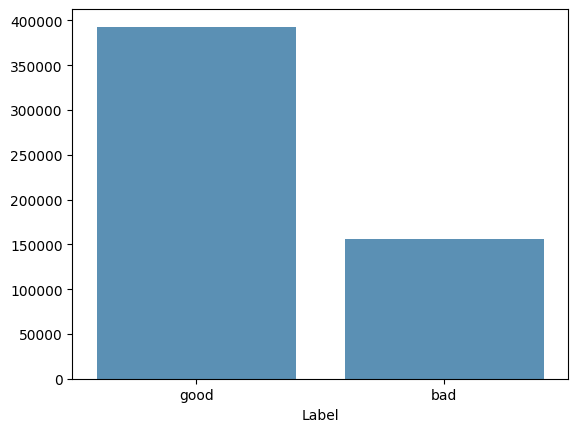

In [8]:

sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8)
plt.show()



In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [10]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [11]:
# this will be pull letter which matches to expression
tokenizer.tokenize(df.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [12]:
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 4.610385600011796 sec


In [13]:
df.sample(5)

,URL,Label,text_tokenized
271243,alibaba.com/showroom/food-manufacturing-compan...,good,"[alibaba, com, showroom, food, manufacturing, ..."
445433,theinertia.com/music-art/the-sainte-catherines...,good,"[theinertia, com, music, art, the, sainte, cat..."
489816,184.164.97.235/town11.pdf,bad,"[town, pdf]"
368359,khurak.net/rene-angelil-0029619/,good,"[khurak, net, rene, angelil]"
73726,www.gnu.org/software/indent/indent.html,good,"[www, gnu, org, software, indent, indent, html]"


In [14]:

stemmer = SnowballStemmer("english")

In [15]:
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 56.494245300011244 sec


In [16]:
df.sample(10)

,URL,Label,text_tokenized,text_stemmed
122522,bzchaoyi.com/js/?http://us.battle.net/login/en...,bad,"[bzchaoyi, com, js, http, us, battle, net, log...","[bzchaoyi, com, js, http, us, battl, net, logi..."
51206,www.jeld-wen.com/caradco/,good,"[www, jeld, wen, com, caradco]","[www, jeld, wen, com, caradco]"
449,www.cad4589.fav.cc/Nova/index2.html,bad,"[www, cad, fav, cc, Nova, index, html]","[www, cad, fav, cc, nova, index, html]"
417710,protennisfan.com/2011/08/mens-rogers-cup-previ...,good,"[protennisfan, com, mens, rogers, cup, preview...","[protennisfan, com, men, roger, cup, preview, ..."
415863,pornhub.com/view_video.php?viewkey=7093bd3eaa5...,good,"[pornhub, com, view, video, php, viewkey, bd, ...","[pornhub, com, view, video, php, viewkey, bd, ..."
178183,en.wikipedia.org/wiki/McGill_University_Library,good,"[en, wikipedia, org, wiki, McGill, University,...","[en, wikipedia, org, wiki, mcgill, univers, li..."
457771,valero.com/Stores/CreditCard/Pages/Home.aspx,good,"[valero, com, Stores, CreditCard, Pages, Home,...","[valero, com, store, creditcard, page, home, a..."
128531,rogersandstephens.com/log/Secur/Secure/Secure/...,bad,"[rogersandstephens, com, log, Secur, Secure, S...","[rogersandstephen, com, log, secur, secur, sec..."
132687,s70.n57.n84.n66.static.myhostcenter.com/mail/i...,bad,"[s, n, n, n, static, myhostcenter, com, mail, ...","[s, n, n, n, static, myhostcent, com, mail, in..."
462487,websters-dictionary-online.org/definitions/Hec...,good,"[websters, dictionary, online, org, definition...","[webster, dictionari, onlin, org, definit, hec..."


In [17]:
print('Getting joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.7233640999766067 sec


In [18]:
df.sample(10)

,URL,Label,text_tokenized,text_stemmed,text_sent
271978,allmusic.com/album/dance-for-one-in-six-r163104,good,"[allmusic, com, album, dance, for, one, in, si...","[allmus, com, album, danc, for, one, in, six, r]",allmus com album danc for one in six r
520743,173.248.20.145/team12.png,bad,"[team, png]","[team, png]",team png
201801,itunes.apple.com/us/album/mahogany-soul/id2554...,good,"[itunes, apple, com, us, album, mahogany, soul...","[itun, appl, com, us, album, mahogani, soul, id]",itun appl com us album mahogani soul id
118270,artistsoftanzania.org/claimc/templates/beez5/c...,bad,"[artistsoftanzania, org, claimc, templates, be...","[artistsoftanzania, org, claimc, templat, beez...",artistsoftanzania org claimc templat beez css ...
10421,accessmarketinginc.com/e.service.paypal.com/us...,bad,"[accessmarketinginc, com, e, service, paypal, ...","[accessmarketinginc, com, e, servic, paypal, c...",accessmarketinginc com e servic paypal com us ...
488648,173.216.240.56/img2212.png,bad,"[img, png]","[img, png]",img png
15699,elya-sissen.com/wp-content/themes/imbalance/th...,bad,"[elya, sissen, com, wp, content, themes, imbal...","[elya, sissen, com, wp, content, theme, imbal,...",elya sissen com wp content theme imbal theme i...
43702,toujoursports.com/Paypal_Virefication/35697ad5...,bad,"[toujoursports, com, Paypal, Virefication, ad,...","[toujoursport, com, paypal, viref, ad, d, ac, ...",toujoursport com paypal viref ad d ac d be bac...
356363,ibiblio.org/hyperwar/USN/ships/ships-cg.html,good,"[ibiblio, org, hyperwar, USN, ships, ships, cg...","[ibiblio, org, hyperwar, usn, ship, ship, cg, ...",ibiblio org hyperwar usn ship ship cg html
187017,fashioncopious.typepad.com/fashioncopious/2011...,good,"[fashioncopious, typepad, com, fashioncopious,...","[fashioncopi, typepad, com, fashioncopi, paran...",fashioncopi typepad com fashioncopi paranorman...


In [19]:
#sliceing classes
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [20]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [21]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [22]:
bad_sites.Label.value_counts()

Label
bad    156422
Name: count, dtype: int64

In [23]:
good_sites.Label.value_counts()

Label
good    392924
Name: count, dtype: int64

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [25]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

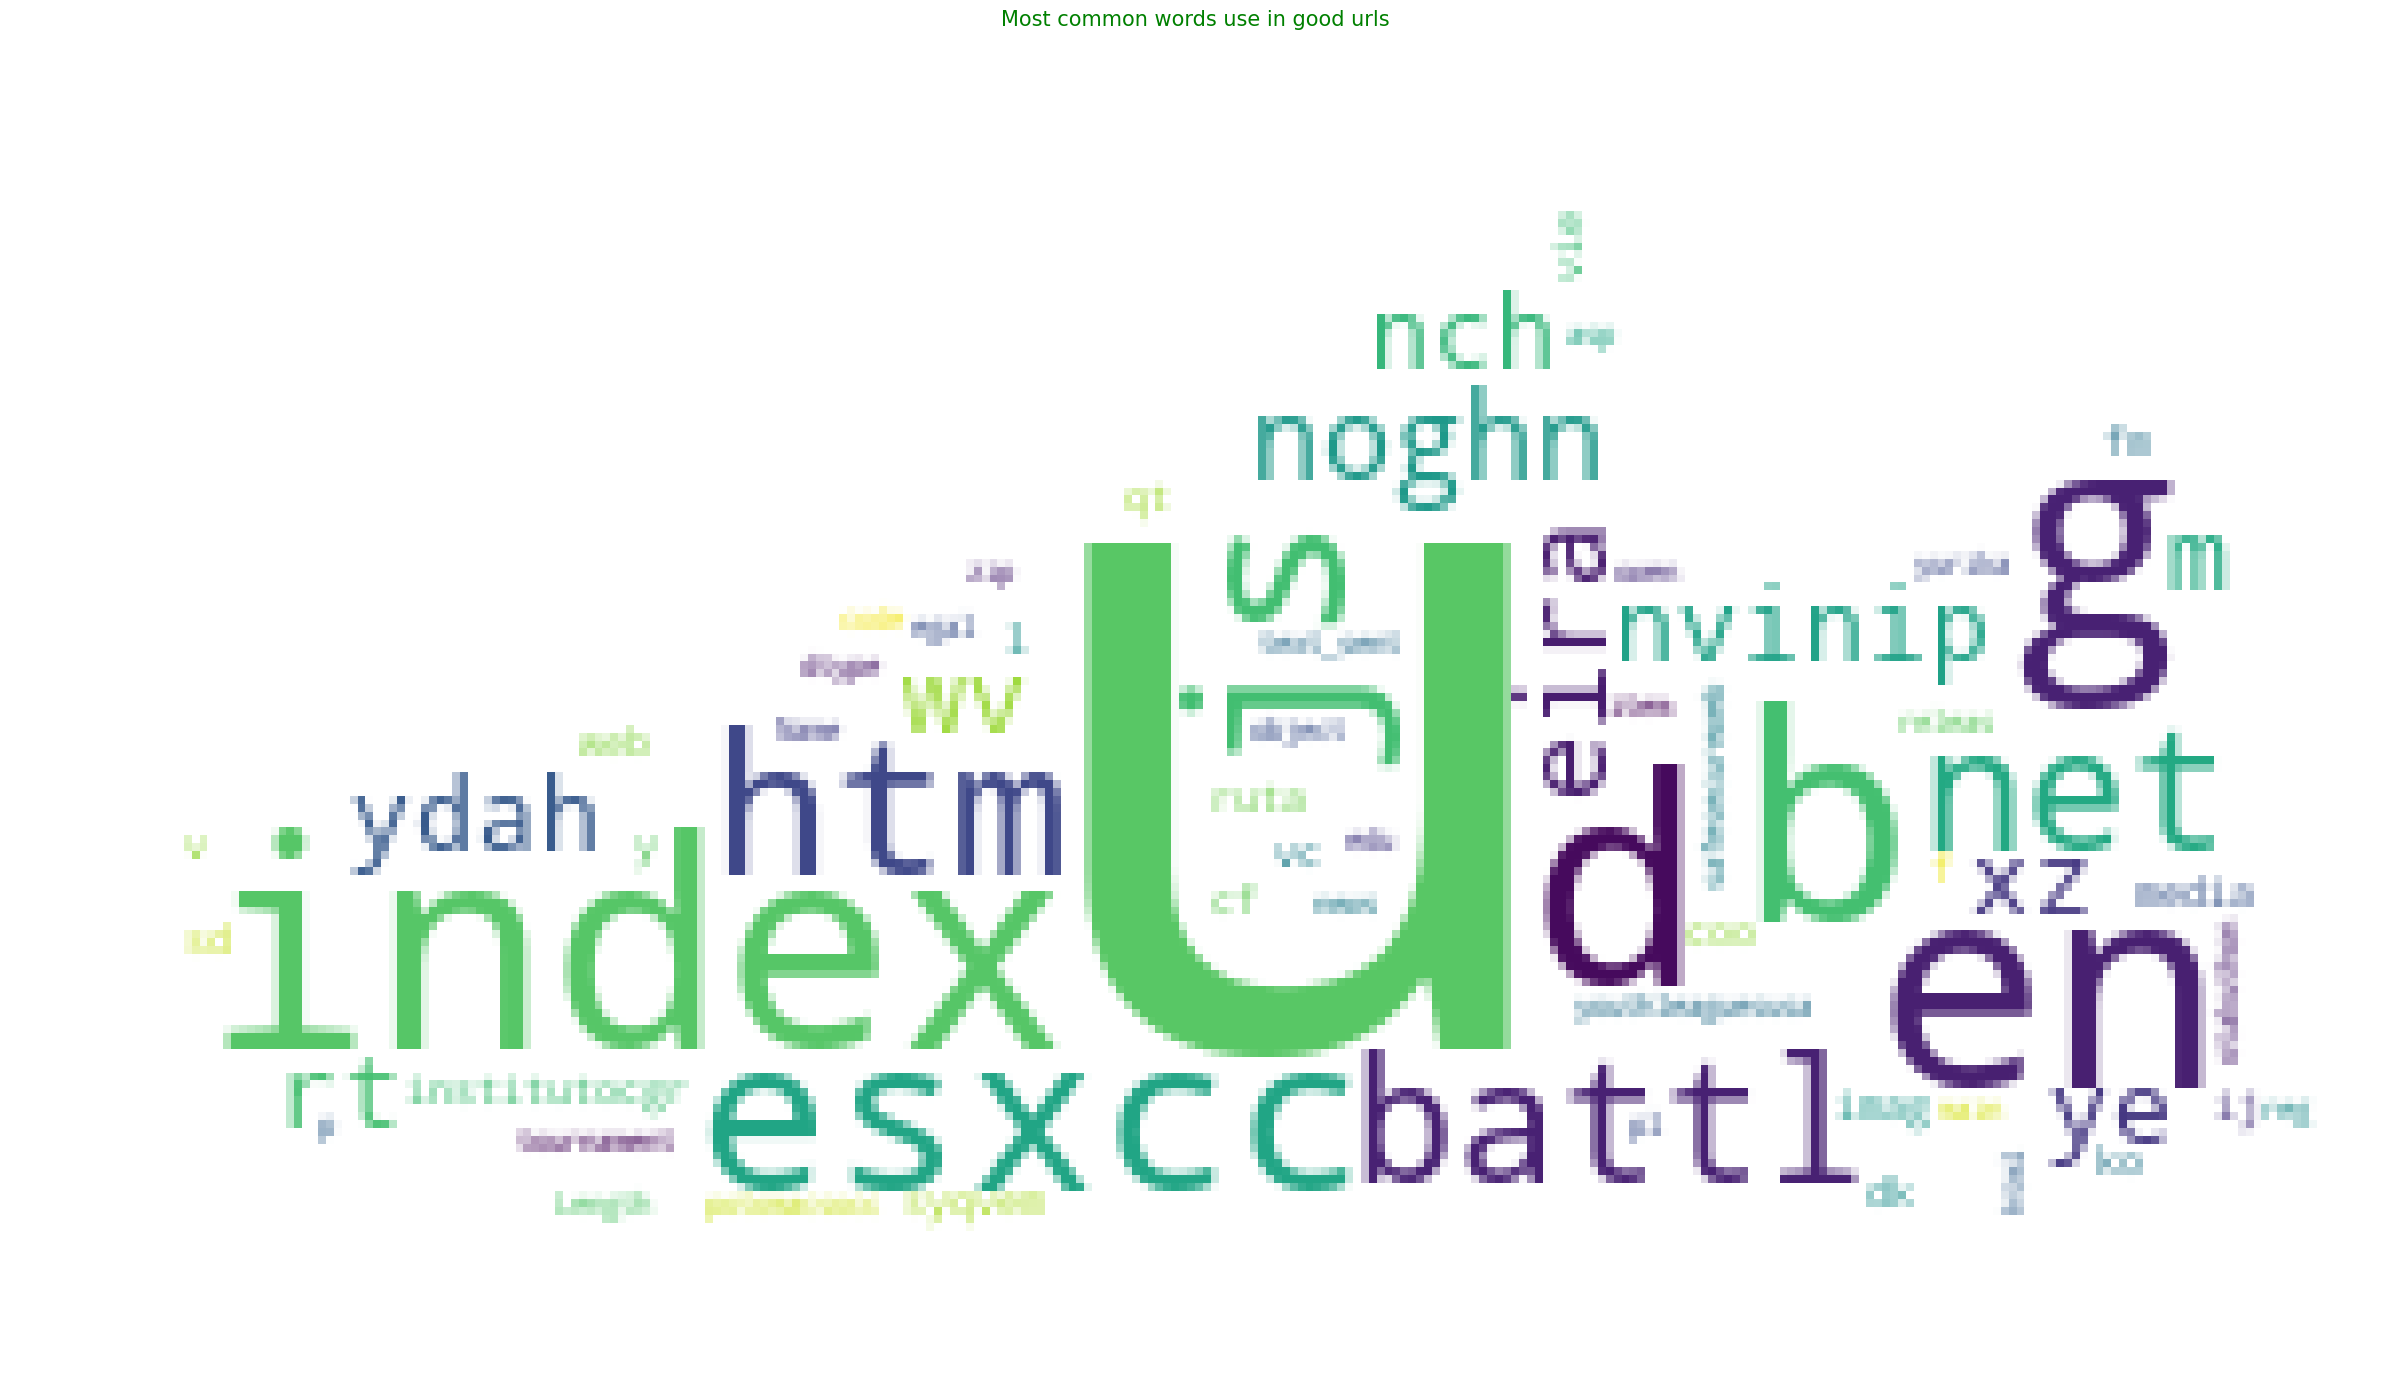

In [26]:
common_text = str(data)
common_mask = np.array(Image.open(r'C:\Users\SD BELALUDDIN17\OneDrive\Pictures\images.jpg'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title='Most common words use in good urls', title_size=15)

In [27]:

data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

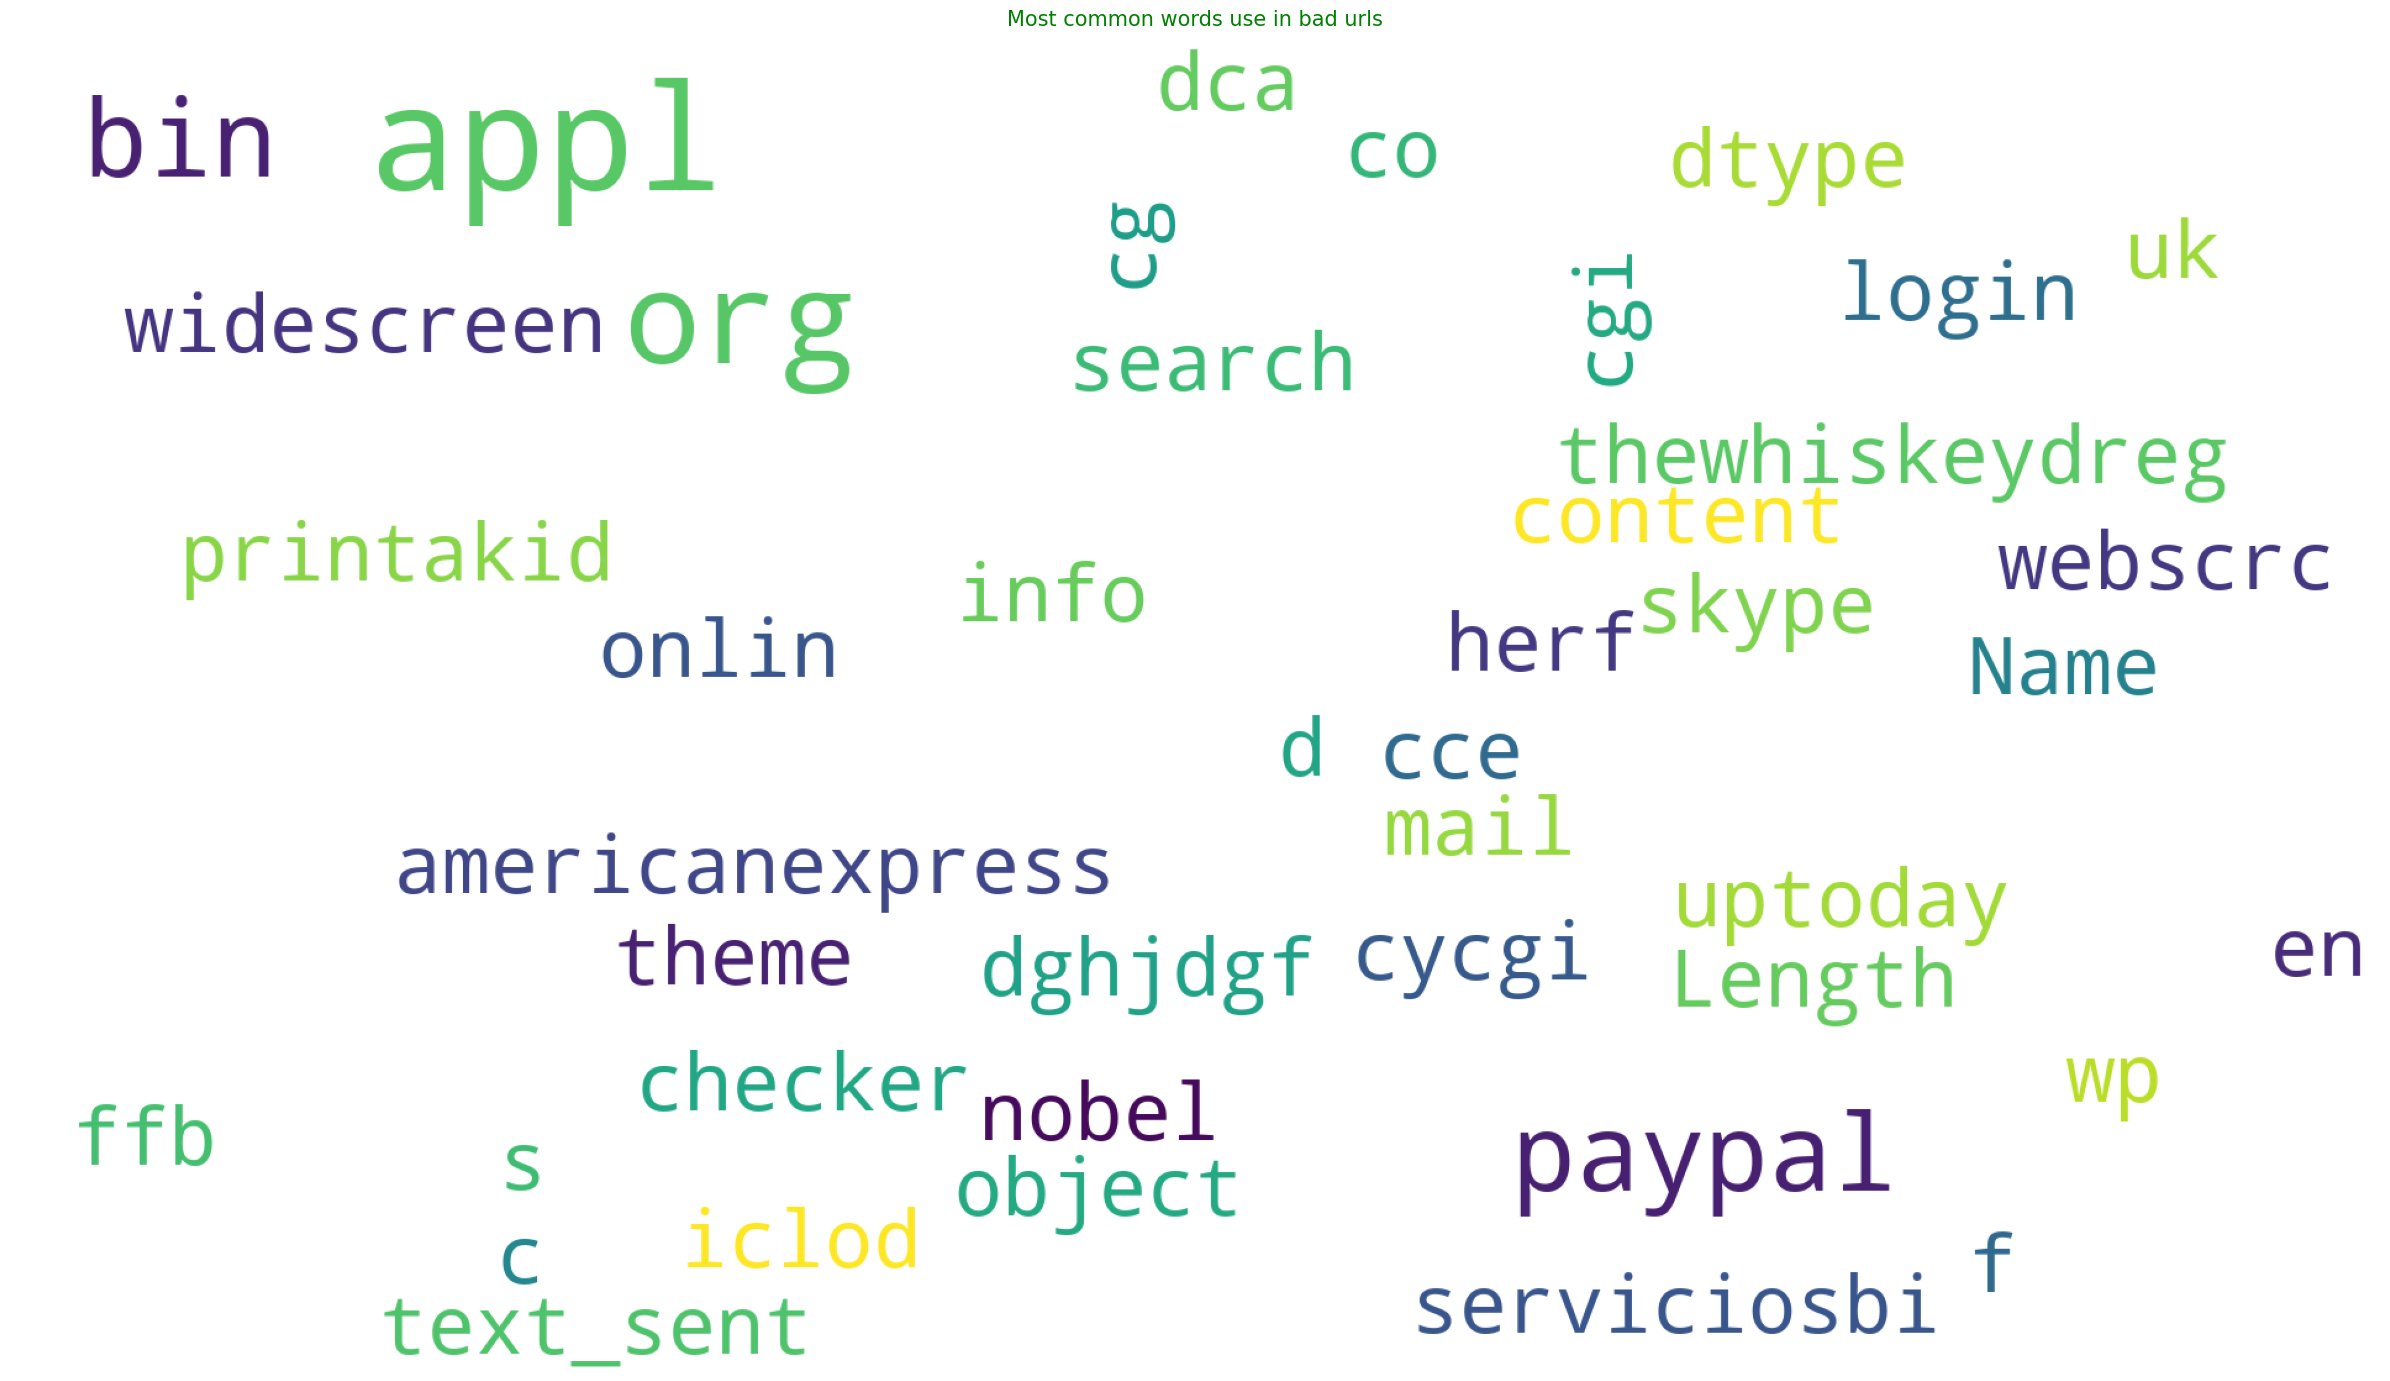

In [28]:
common_text = str(data)
common_mask = np.array(Image.open(r'C:\Users\SD BELALUDDIN17\OneDrive\Pictures\wallpaper1.jpeg'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

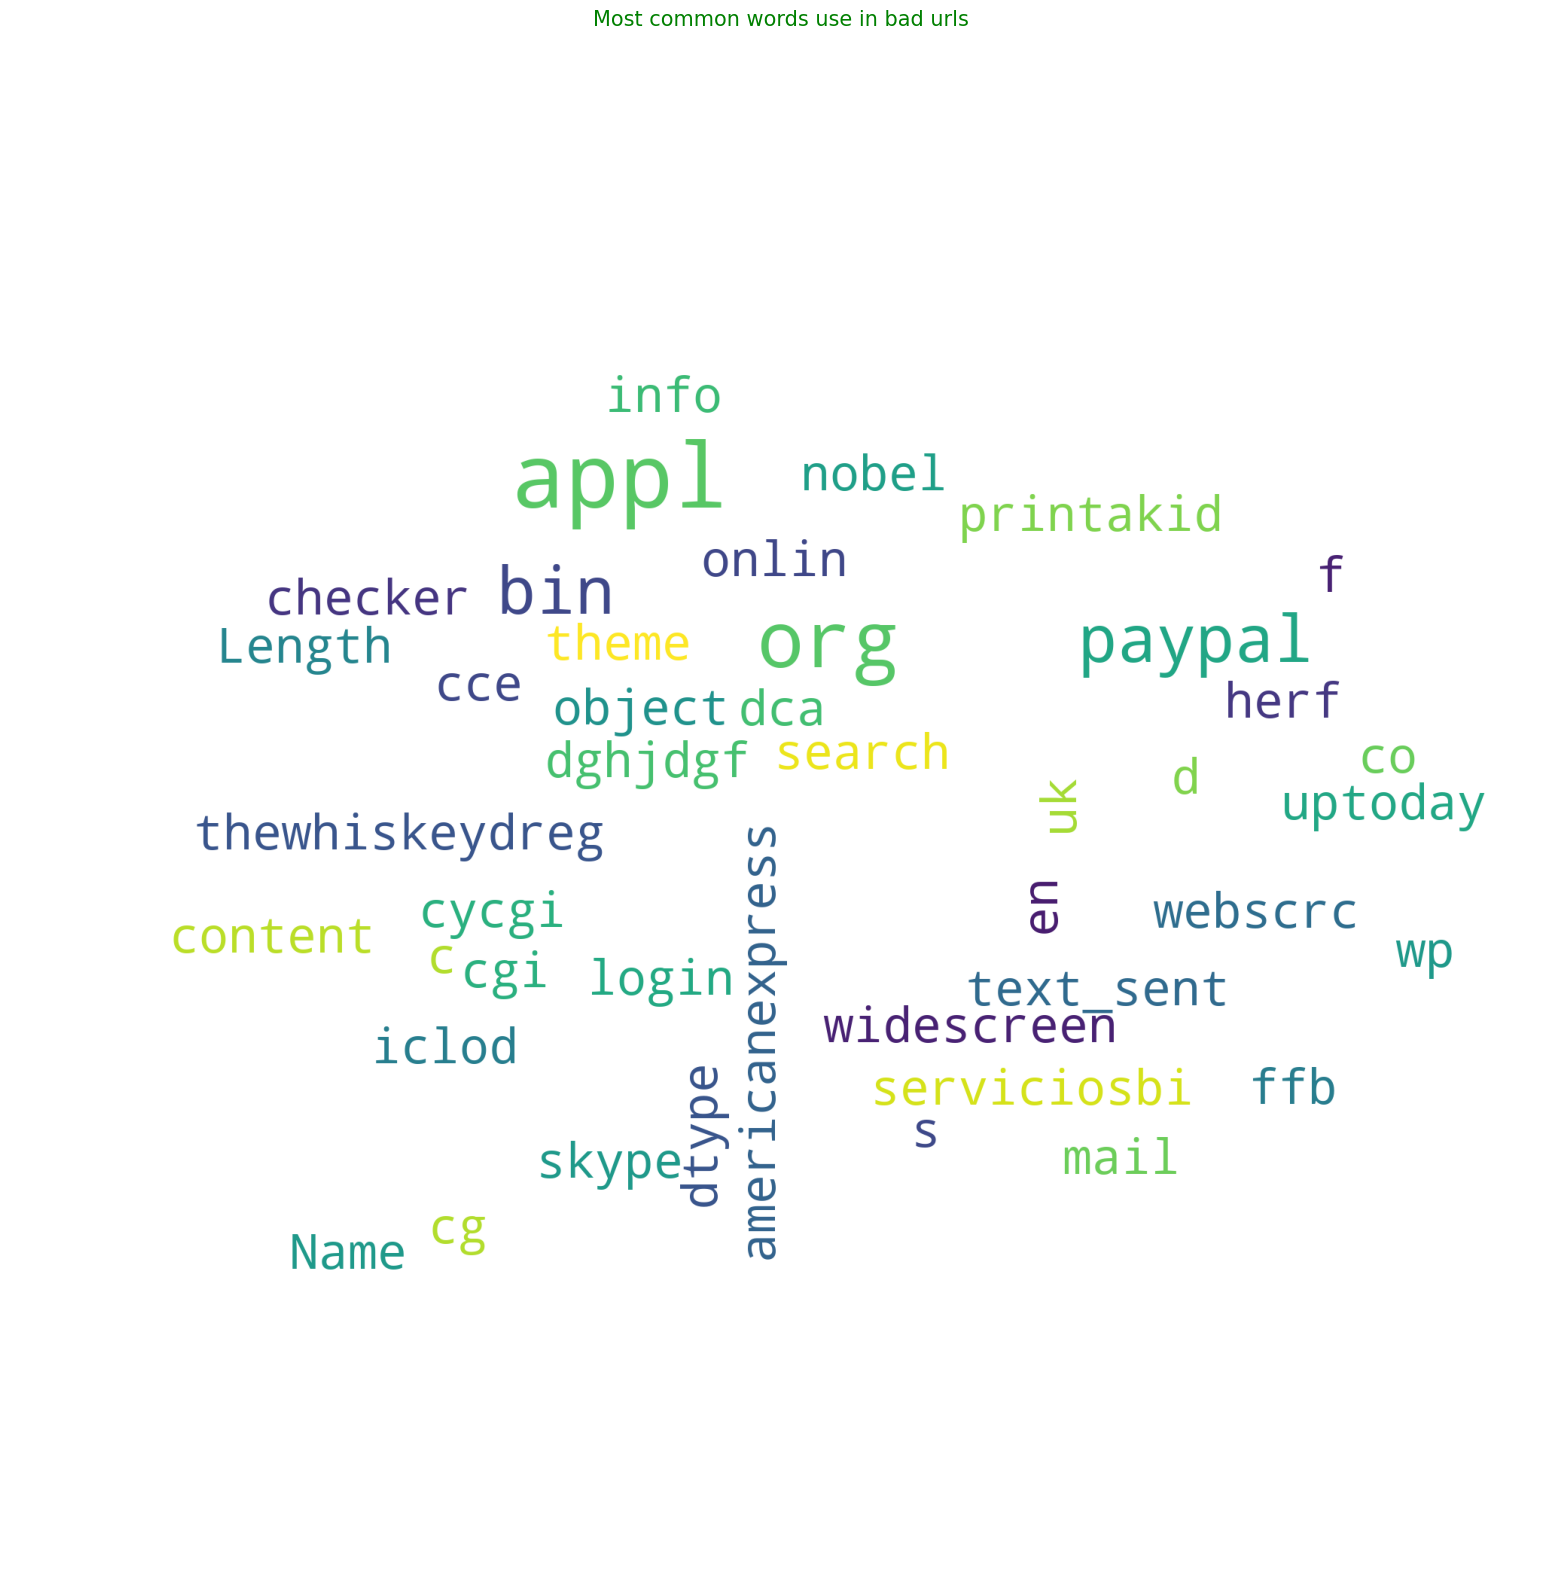

In [29]:
common_text = str(data)
common_mask = np.array(Image.open(r'C:\Users\SD BELALUDDIN17\Downloads\comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

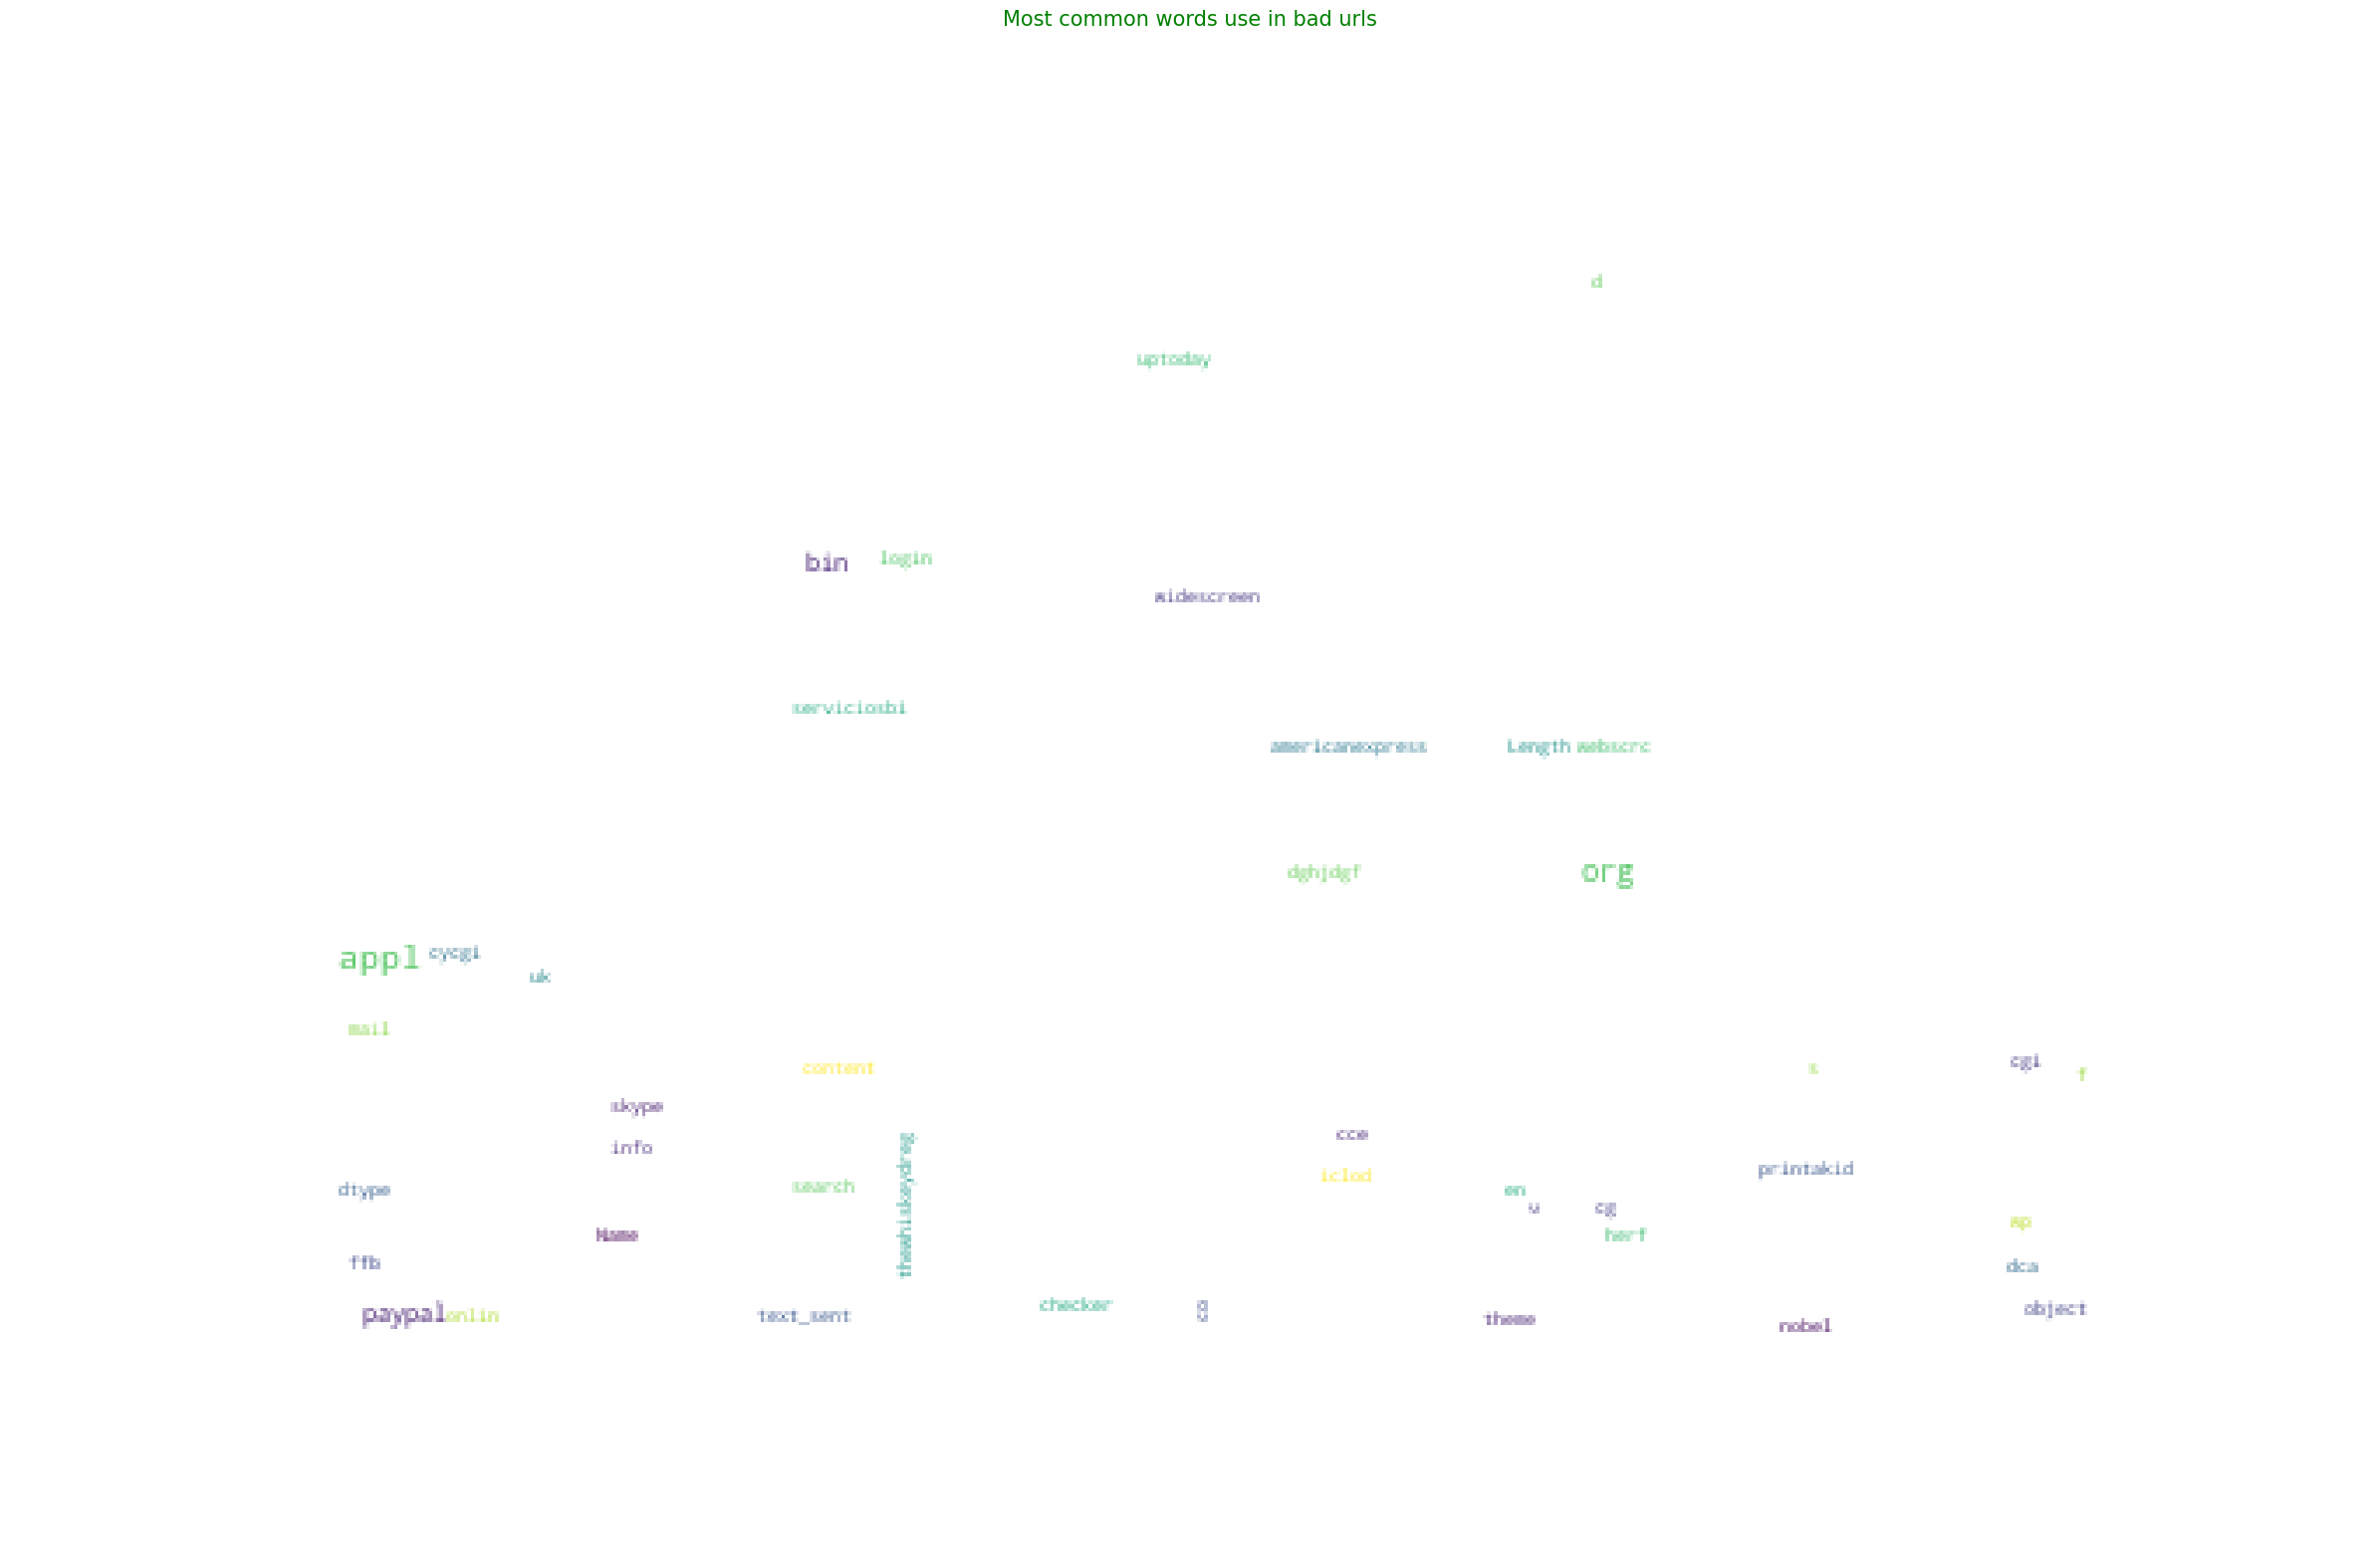

In [30]:
common_text = str(data)
import requests
from io import BytesIO

# Fetch the image from the URL
url = 'https://github.com/taruntiwarihp/raw_images/blob/master/Words%20cloud%20images/cloud-1.png?raw=true'
response = requests.get(url)
response.raise_for_status()  # Raise an error for bad status codes

# Open the image using BytesIO
common_mask = np.array(Image.open(BytesIO(response.content)))

# Plot the word cloud
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title='Most common words use in bad urls', title_size=15)

In [31]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from selenium.common.exceptions import WebDriverException

# Specify the path to the ChromeDriver executable
service = Service(r"chromedriver.exe")
# options = Options()
# options.add_argument("--headless")  # Run without GUI
browser = webdriver.Chrome(service=service, )

In [32]:
list_urls = ['https://www.weeniebreedershome.com', 'https://www.davidminidachshundhaven.com','https://www.laurasdoodles.online']
links_with_text = []

In [33]:
for url in list_urls:
    try:
        browser.get(url)
        soup = BeautifulSoup(browser.page_source, "html.parser")
        for line in soup.find_all('a'):
            href = line.get('href')
            links_with_text.append([url, href])
    except WebDriverException as e:
        print(f"Error accessing {url}: {e}")

Error accessing https://www.weeniebreedershome.com: Message: unknown error: net::ERR_NAME_NOT_RESOLVED
  (Session info: chrome=135.0.7049.116)
Stacktrace:
	GetHandleVerifier [0x00007FF7F7C05335+78597]
	GetHandleVerifier [0x00007FF7F7C05390+78688]
	(No symbol) [0x00007FF7F79B91AA]
	(No symbol) [0x00007FF7F79B5BA0]
	(No symbol) [0x00007FF7F79A6849]
	(No symbol) [0x00007FF7F79A85A8]
	(No symbol) [0x00007FF7F79A6B56]
	(No symbol) [0x00007FF7F79A65D6]
	(No symbol) [0x00007FF7F79A629A]
	(No symbol) [0x00007FF7F79A3F4A]
	(No symbol) [0x00007FF7F79A471C]
	(No symbol) [0x00007FF7F79BD07A]
	(No symbol) [0x00007FF7F7A6002E]
	(No symbol) [0x00007FF7F7A370EA]
	(No symbol) [0x00007FF7F7A5F2BB]
	(No symbol) [0x00007FF7F7A36EC3]
	(No symbol) [0x00007FF7F7A003F8]
	(No symbol) [0x00007FF7F7A01163]
	GetHandleVerifier [0x00007FF7F7EAEEED+2870973]
	GetHandleVerifier [0x00007FF7F7EA9698+2848360]
	GetHandleVerifier [0x00007FF7F7EC6973+2967875]
	GetHandleVerifier [0x00007FF7F7C2017A+188746]
	GetHandleVerifier

In [34]:
df1 = pd.DataFrame(links_with_text, columns=["from", "to"])

In [35]:
df1.head()

,from,to


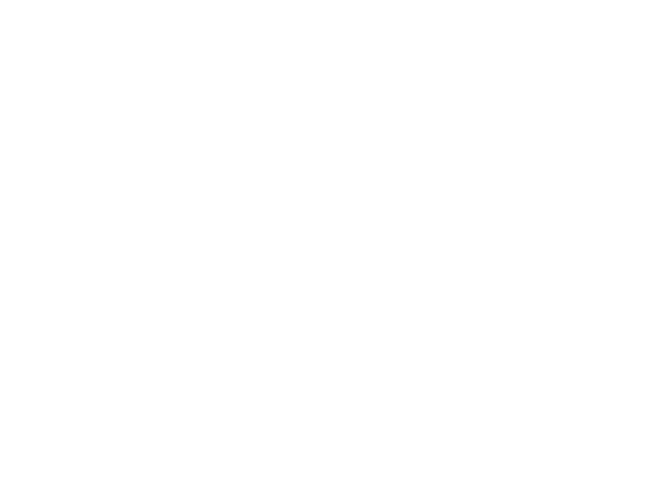

In [36]:
GA = nx.from_pandas_edgelist(df1, source="from", target="to")
nx.draw(GA, with_labels=False)

In [37]:

#create cv object
cv = CountVectorizer()

In [38]:
# help(CountVectorizer())

In [39]:

feature = cv.fit_transform(df['text_sent'])

In [41]:
if 'text_sent' not in df1.columns:
    print("Column 'text_sent' does not exist. Generating it from 'to' column...")
    df1['text_sent'] = df1['to'].apply(lambda x: x.lower() if isinstance(x, str) else '')

# Ensure there is valid data in the 'text_sent' column
if df1['text_sent'].str.strip().any():
    cv = CountVectorizer()
    feature = cv.fit_transform(df1['text_sent'])
    print("Feature matrix:\n", feature.toarray())
else:
    print("No valid text data found in 'text_sent' column. Cannot generate feature matrix.")

No valid text data found in 'text_sent' column. Cannot generate feature matrix.


In [42]:

feature = cv.fit_transform(df.text_sent)

In [43]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label)

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(trainX,trainY)

LogisticRegression()

In [47]:
lr.score(testX,testY)

0.9649475378084565

In [48]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9789106548643355
Testing Accuracy : 0.9649475378084565

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36961
        Good       0.99      0.96      0.98    100376

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.97    137337


CONFUSION MATRIX


<Axes: >

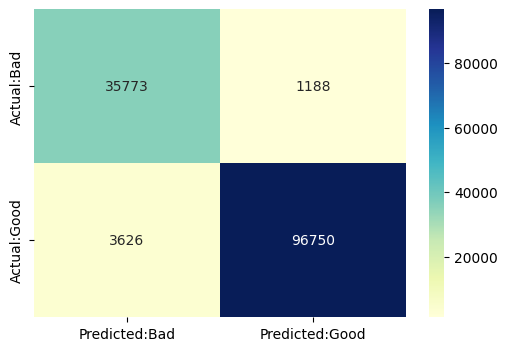

In [49]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [50]:
# create mnb object
mnb = MultinomialNB()

In [51]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [52]:
mnb.score(testX,testY)

0.9575715211487072

In [53]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.974240853961928
Testing Accuracy : 0.9575715211487072

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.93     38420
        Good       0.98      0.97      0.97     98917

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

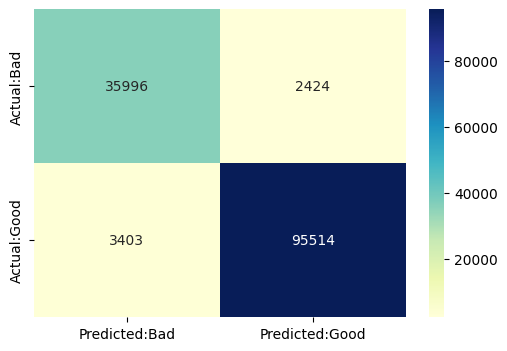

In [54]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<Axes: xlabel='None', ylabel='Accuracy'>

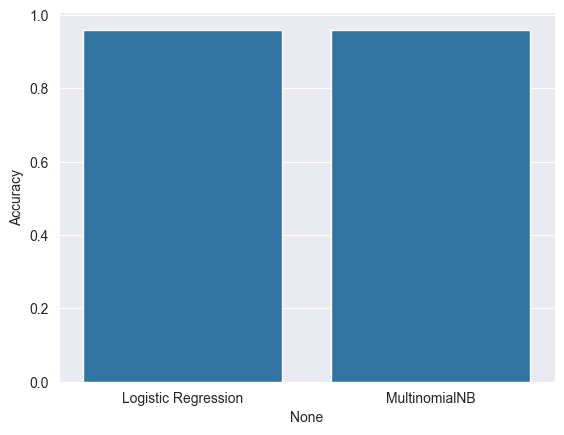

In [55]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index, y=acc.Accuracy)

In [56]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [57]:
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)

In [58]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [59]:
pipeline_ls.score(testX,testY)

0.9667169080437172

Training Accuracy : 0.9806047926137536
Testing Accuracy : 0.9667169080437172

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     37106
        Good       0.99      0.97      0.98    100231

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

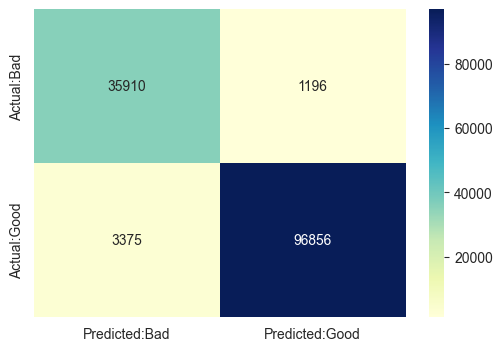

In [60]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [61]:
pickle.dump(pipeline_ls,open('model/phishing.pkl','wb'))

In [62]:
loaded_model = pickle.load(open('model/phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9667169080437172


* Bad links => this are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
(https://www.awesomepets-sa.com)
(https://www.laurasdoodles.online)
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html

In [65]:
predict_bad = ['youtube.com/','fazan-pacir.rs/temp/libraries/ipad','https://www.definncu.com','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt','https://www.myfurryfriendpuppies.com','https://www.davidminidachshundhaven.com']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','fazan-pacir.rs/temp/libraries/ipad','restorevisioncenters.com/html/technology.html', 'https://www.geeksforgeeks.org/problems/alien-dictionary/1', 'https://github.com/taruntiwarihp/Projects_DS/tree/master/Phishing%20Site%20URLs%20Prediction']
loaded_model = pickle.load(open('model/phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("-"*50)
print(result2)

['good' 'bad' 'bad' 'bad' 'bad' 'bad']
--------------------------------------------------
['good' 'good' 'bad' 'good' 'good' 'good']


In [64]:
import pickle

# Save model
with open('model/phishing_model.pkl', 'wb') as file:
    pickle.dump(pipeline_ls, file)

# Save vectorizer
with open('model/vectorizer.pkl', 'wb') as file:
    pickle.dump(cv, file)


In [ ]:
from urllib.parse import urlparse
import re

def url_tokenizer(url):
    tokens = []
    parsed = urlparse(url)
    
    # Add domain, path, etc.
    tokens.extend(parsed.netloc.split('.'))
    tokens.extend(parsed.path.split('/'))
    tokens.extend(parsed.query.split('&'))
    
    # Extract other patterns
    tokens.extend(re.findall(r'[a-z]+', url.lower()))
    tokens.extend(re.findall(r'\d+', url))
    
    return [token for token in tokens if token and token != 'com']


In [ ]:
pipeline_ls = make_pipeline(
    CountVectorizer(tokenizer=url_tokenizer, stop_words='english'),
    LogisticRegression()
)




Training Accuracy : 0.9916332177411281
Testing Accuracy : 0.9748794029307363

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.93      0.95     31200
        Good       0.97      0.99      0.98     78670

    accuracy                           0.97    109870
   macro avg       0.98      0.96      0.97    109870
weighted avg       0.97      0.97      0.97    109870



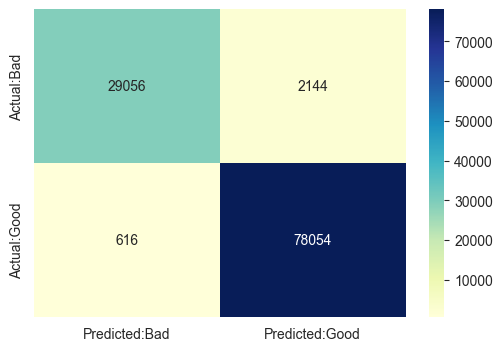

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle

trainX, testX, trainY, testY = train_test_split(df.URL, df.Label, test_size=0.2, random_state=42)

pipeline_ls.fit(trainX, trainY)

print('Training Accuracy :', pipeline_ls.score(trainX, trainY))
print('Testing Accuracy :', pipeline_ls.score(testX, testY))

con_mat = pd.DataFrame(
    confusion_matrix(testY, pipeline_ls.predict(testX)),
    columns=['Predicted:Bad', 'Predicted:Good'],
    index=['Actual:Bad', 'Actual:Good']
)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(testY, pipeline_ls.predict(testX), target_names=['Bad', 'Good']))

plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

# Save model
pickle.dump(pipeline_ls, open('phishing.pkl', 'wb'))



In [ ]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))

predict_bad = [
    'yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',
    'youtube.com/',
    'https://www.definncu.com',
    'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt',
    'https://www.myfurryfriendpuppies.com',
    'https://www.davidminidachshundhaven.com'
]

predict_good = [
    'youtube.com/',
    'youtube.com/watch?v=qI0TQJI3vdU',
    'retailhellunderground.com/',
    'restorevisioncenters.com/html/technology.html',
    'https://www.geeksforgeeks.org/problems/alien-dictionary/1',
    'https://github.com/taruntiwarihp/Projects_DS/tree/master/Phishing%20Site%20URLs%20Prediction'
]

result_bad = loaded_model.predict(predict_bad)
result_good = loaded_model.predict(predict_good)

print(result_bad)
print("*" * 30)
print(result_good)


['bad' 'good' 'bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good' 'good' 'good']


In [ ]:
# If using a separate CountVectorizer instead of pipeline
vectorizer = CountVectorizer(tokenizer=url_tokenizer, stop_words='english')
vectorizer.fit(df.URL)

with open('model/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


In [ ]:
import re
from urllib.parse import urlparse

def extract_features(url):
    parsed = urlparse(url)
    domain = parsed.netloc
    path = parsed.path

    features = {}

    # Length-based features
    features['url_length'] = len(url)
    features['hostname_length'] = len(domain)
    features['path_length'] = len(path)
    features['count_dots'] = url.count('.')
    features['count_hyphens'] = url.count('-')
    features['count_at'] = url.count('@')
    features['count_slash'] = url.count('/')
    features['count_question'] = url.count('?')
    features['count_equals'] = url.count('=')
    features['count_percent'] = url.count('%')
    features['count_http'] = url.lower().count('http')
    features['count_https'] = url.lower().count('https')

    # Boolean features
    features['has_https'] = 1 if parsed.scheme == 'https' else 0
    features['has_ip'] = 1 if re.fullmatch(r'(\d{1,3}\.){3}\d{1,3}', domain) else 0
    features['has_www'] = 1 if 'www' in url else 0
    features['has_login'] = 1 if 'login' in url.lower() else 0
    features['has_admin'] = 1 if 'admin' in url.lower() else 0
    features['has_secure'] = 1 if 'secure' in url.lower() else 0

    # Position-based features
    features['is_shortened'] = 1 if re.search(r'(bit\.ly|tinyurl\.com|goo\.gl|ow\.ly|t\.co)', domain) else 0

    return features


In [ ]:
df_features = df.URL.apply(lambda x: pd.Series(extract_features(x)))
df_final = pd.concat([df, df_features], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_text = df_final['URL']  # for vectorizer
# Ensure 'count_slashes' exists in df_final
if 'count_slashes' not in df_final.columns:
    df_final['count_slashes'] = df_final['URL'].apply(lambda x: x.count('/') if isinstance(x, str) else 0)

X_numeric = df_final[['url_length','hostname_length','path_length', 'count_dots', 'count_hyphens', 'count_at', 'count_slashes','count_question', 'count_equals','count_percent','count_http','count_https' ,'has_https', 'has_ip','has_www','has_login','has_admin','has_secure']]
y = df_final['Label']

X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


In [ ]:
class ManualFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # If X is already a NumPy array, return as is
        return X  # ✅ No .values needed!


In [ ]:
text_transformer = CountVectorizer(tokenizer=url_tokenizer, stop_words='english')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('manual', ManualFeatures())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'url'),
        ('num', numeric_transformer, ['url_length','hostname_length','path_length', 'count_dots', 'count_hyphens', 'count_at', 'count_slashes','count_question', 'count_equals','count_percent','count_http','count_https' ,'has_https', 'has_ip','has_www','has_login','has_admin','has_secure'])
    ]
)

final_df = pd.concat([X_text, X_numeric], axis=1)
final_df.columns = ['url'] + list(X_numeric.columns)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(final_df, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  CountVectorizer(stop_words='english',
                                                                  tokenizer=<function url_tokenizer at 0x000002433529EDE0>),
                                                  'url'),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('manual',
                                                                   ManualFeatures())]),
                                                  ['url_length',
                                                   'hostname_length',
                                                   'path_length', 'count_dots',
                                                   'count_hyphens', 'count_at',
                                                   'count_slashes',
                                                   'count_question',
                                                   'count_equals',
                                                   'count_percent',
                                                   'count_http', 'count_https',
                                                   'has_https', 'has_ip',
                                                   'has_www', 'has_login',
                                                   'has_admin',
                                                   'has_secure'])])),
                ('classifier', LogisticRegression())])

In [ ]:
test_df = pd.concat([X_text_test, X_num_test], axis=1)
test_df.columns = ['url'] + list(X_numeric.columns)

print('Training Accuracy:', pipeline.score(final_df, y))
print('Testing Accuracy:', pipeline.score(test_df, y_test))


Training Accuracy: 0.98427948870111
Testing Accuracy: 0.9838445435514699


In [ ]:
import dill

# Save the model using dill
with open('model/phishing_model_combined.pkl', 'wb') as f:
    dill.dump(pipeline_ls, f)



In [ ]:
import dill
loaded_model = dill.load(open('model/phishing_model_combined.pkl', 'rb'))

predict_bad = [
    'yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',
    'youtube.com/',
    'https://www.definncu.com',
    'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt',
    'https://www.myfurryfriendpuppies.com',
    'https://www.davidminidachshundhaven.com'
]

predict_good = [
    'youtube.com/',
    'youtube.com/watch?v=qI0TQJI3vdU',
    'retailhellunderground.com/',
    'restorevisioncenters.com/html/technology.html',
    'https://www.vertexvistascu.com',
    'https://github.com/taruntiwarihp/Projects_DS/tree/master/Phishing%20Site%20URLs%20Prediction'
]

result_bad = loaded_model.predict(predict_bad)
result_good = loaded_model.predict(predict_good)

print(result_bad)
print("*" * 30)
print(result_good)


['bad' 'good' 'bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good' 'good' 'good']


In [8]:
%pip install validators

import re
import socket
import ssl
import ipaddress
import tldextract
from urllib.parse import urlparse, unquote
import validators
import logging

# Logging setup
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')

# Suspicious terms often used in phishing
SUSPICIOUS_KEYWORDS = [
    'login', 'verify', 'secure', 'account', 'update', 'signin', 'banking',
    'confirm', 'validate', 'reset', 'submit', 'click', 'free', 'giveaway',
    'limited', 'deal', 'payment', 'recover', 'urgent'
]

# Common suspicious TLDs
SUSPICIOUS_TLDS = {'tk', 'ml', 'ga', 'cf', 'gq', 'xyz', 'top', 'work', 'club', 'info'}

# Common URL shorteners
URL_SHORTENERS = {'bit.ly', 'goo.gl', 't.co', 'tinyurl.com', 'is.gd', 'ow.ly'}

# Characters commonly used in phishing obfuscation
SUSPICIOUS_SPECIAL_CHARACTERS = {'@', '%', '-', '_', '&', '$', '=', '+'}

def extract_domain(url):
    """Extracts the domain from a URL, ensuring validation."""
    if not validators.url(url):
        return "InvalidDomain"
    ext = tldextract.extract(url)
    return f"{ext.domain}.{ext.suffix}"

def is_ip_address(domain):
    """Checks if the given domain is an IP address."""
    try:
        ipaddress.ip_address(domain)
        return True
    except ValueError:
        return False

def is_private_ip(domain):
    """Checks if an IP address is private."""
    try:
        ip = ipaddress.ip_address(domain)
        return ip.is_private
    except:
        return False

def validate_ssl(domain):
    """Validates SSL certificate details."""
    try:
        ctx = ssl.create_default_context()
        with ctx.wrap_socket(socket.socket(), server_hostname=domain) as s:
            s.settimeout(2)  # Reduce timeout to prevent delays
            s.connect((domain, 443))
            cert = s.getpeercert()
            expire_date = cert.get('notAfter', None)

            if expire_date:
                return {"valid_ssl_cert": True}
        return {"valid_ssl_cert": False}
    except Exception:
        return {"valid_ssl_cert": False}

def extract_url_features(url: str) -> dict:
    """Extracts phishing-related features from a given URL."""
    try:
        parsed = urlparse(url)
        domain = extract_domain(url)
        netloc = parsed.netloc.split('@')[-1].split(':')[0]
        is_ip = is_ip_address(netloc)

        ssl_feats = validate_ssl(domain) if parsed.scheme == 'https' else {"valid_ssl_cert": False}

        feats = {
            "url": url,
            "uses_ip_address": is_ip,
            "is_private_ip": is_private_ip(netloc) if is_ip else False,
            "domain": domain,
            "https_enabled": parsed.scheme == 'https',
            "has_suspicious_keywords": any(w in unquote(url).lower() for w in SUSPICIOUS_KEYWORDS),
            "url_length": len(url),
            "has_hex_encoding": bool(re.search(r'%[0-9a-fA-F]{2}', url)),
            "has_at_symbol": '@' in url,
            "has_special_chars": any(c in url for c in SUSPICIOUS_SPECIAL_CHARACTERS),
            "has_double_slash_path": '//' in parsed.path.lstrip('/'),
            "subdomain_count": netloc.count('.') - 1,
            "tld_in_suspicious_list": domain.split('.')[-1] in SUSPICIOUS_TLDS,
            "shortened_url": domain in URL_SHORTENERS,
            "contains_port": ':' in parsed.netloc,
            "num_digits_in_url": sum(c.isdigit() for c in url),
            "num_letters_in_url": sum(c.isalpha() for c in url),
            "digit_to_length_ratio": sum(c.isdigit() for c in url) / len(url) if len(url) > 0 else 0,
            **ssl_feats
        }

        # Flag reasons based on common phishing indicators
        if feats["has_suspicious_keywords"] and feats["shortened_url"]:
            feats["flag_reason"] = "Suspicious keywords + shortened URL"
        elif feats["uses_ip_address"] and not feats["is_private_ip"]:
            feats["flag_reason"] = "Public IP used as domain"
        elif feats["has_at_symbol"]:
            feats["flag_reason"] = "Obfuscated with '@'"
        elif feats["has_special_chars"]:
            feats["flag_reason"] = "Suspicious special characters in URL"
        elif feats["num_digits_in_url"] > len(url) * 0.3:  # More than 30% digits in the URL
            feats["flag_reason"] = "Excessive digits in URL"
        elif not feats["https_enabled"]:
            feats["flag_reason"] = "Not using HTTPS"
        else:
            feats["flag_reason"] = ""

        return feats
    except Exception as e:
        logging.error(f"Feature extraction failed for {url}: {e}")
        return {}

# Example usage
if __name__ == "__main__":
    test_url = "https://secure-login-paypal.tk"
    features = extract_url_features(test_url)
    logging.info(f"Features for {test_url}:\n{features}")


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[INFO] Features for https://secure-login-paypal.tk:
{'url': 'https://secure-login-paypal.tk', 'uses_ip_address': False, 'is_private_ip': False, 'domain': 'secure-login-paypal.tk', 'https_enabled': True, 'has_suspicious_keywords': True, 'url_length': 30, 'has_hex_encoding': False, 'has_at_symbol': False, 'has_special_chars': True, 'has_double_slash_path': False, 'subdomain_count': 0, 'tld_in_suspicious_list': True, 'shortened_url': False, 'contains_port': False, 'num_digits_in_url': 0, 'num_letters_in_url': 24, 'digit_to_length_ratio': 0.0, 'valid_ssl_cert': False, 'flag_reason': 'Suspicious special characters in URL'}


In [9]:
import pandas as pd
import pickle
import logging
from pathlib import Path
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from feature import extract_url_features

# Setup
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')
DATA_PATH = Path("data/phishing_site_urls.csv")
MODEL_DIR = Path("model")
MODEL_PATH = MODEL_DIR / "phishing_model2.pkl"
VECTORIZER_PATH = MODEL_DIR / "vectorizer2.pkl"

MODEL_DIR.mkdir(parents=True, exist_ok=True)

def load_data():
    """Loads and preprocesses the dataset."""
    logging.info("Loading dataset...")
    df = pd.read_csv(DATA_PATH, usecols=["URL", "Label"]).dropna()
    df["Label"] = df["Label"].map({"good": 0, "bad": 1})
    return df[df["URL"].str.strip() != ""]

def extract_features(df):
    """Efficient feature extraction using batch processing."""
    logging.info("Extracting features...")
    df["features"] = df["URL"].apply(extract_url_features)
    return df[df["features"].apply(bool)]  # Filter out empty feature extractions

# Load data and extract features
df = load_data()
df = extract_features(df)

# Train-test split with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    df["features"].tolist(), df["Label"], test_size=0.2, stratify=df["Label"], random_state=42
)

# Define pipeline
pipeline = Pipeline([
    ("vectorizer", DictVectorizer(sparse=False)),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning using RandomizedSearchCV (faster than GridSearchCV)
param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

grid = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, scoring="f1", verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

# Evaluate
y_pred = grid.predict(X_test)
logging.info(f"Best Parameters: {grid.best_params_}")
logging.info(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
logging.info(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
logging.info("Classification Report:\n" + classification_report(y_test, y_pred))

# Save best model and vectorizer
best_model = grid.best_estimator_
with open(MODEL_PATH, "wb") as f:
    pickle.dump(best_model, f)

with open(VECTORIZER_PATH, "wb") as f:
    pickle.dump(best_model.named_steps["vectorizer"], f)

logging.info(f"Model saved at {MODEL_PATH}")
logging.info(f"Vectorizer saved at {VECTORIZER_PATH}")

def update_model_with_feedback(new_url: str, feedback: str):
    """Incrementally updates model with user feedback."""
    if feedback not in ["good", "bad"]:
        raise ValueError("Feedback must be 'good' or 'bad'.")

    new_label = 0 if feedback == "good" else 1

    try:
        new_features = extract_url_features(new_url)
        if not new_features:
            logging.warning("No features extracted.")
            return
    except Exception as e:
        logging.error(f"Feature extraction error: {e}")
        return

    # Append new data and retrain incrementally
    X_train.append(new_features)
    y_train.append(new_label)

    logging.info("Retraining model incrementally with feedback...")
    best_model.fit(X_train, y_train)

    # Save updated model
    with open(MODEL_PATH, "wb") as f:
        pickle.dump(best_model, f)

    logging.info(f"Updated model saved at {MODEL_PATH}")

if __name__ == "__main__":
    logging.info("Training complete. Ready for feedback updates.")


[INFO] Loading dataset...
[INFO] Extracting features...


Fitting 5 folds for each of 10 candidates, totalling 50 fits


OSError: [WinError 1450] Insufficient system resources exist to complete the requested service